In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mdptoolbox
import sys 
sys.path.append('/home/navdeep/scripts/')
import tools as tl

In [2]:
#single restless Bandit
class pm:
    n = 12 # number of states
    S = np.arange(n)
    R = np.zeros(n)
    R[-1] = 1
    R = np.transpose([R,R]) # reward matrix
    A = np.transpose([np.zeros(n),np.ones(n)]) # subsidy matrix  
    D = np.arange(n)
    P0 = np.identity(n)/2
    P1 = np.identity(n)/2
    for i in range(n):
        P0[i,np.mod(i+1,n)] = 1/2
        P1[i,np.mod(i-1,n)] = 1/2
    P = np.array([P0,P1])

In [18]:
def pol(pm,l):
    rvi = mdptoolbox.mdp.RelativeValueIteration(pm.P, pm.R+l*pm.A)
    rvi.run()
    rvi.average_reward

    return rvi.policy
        

In [20]:
def stat(pm,pi):
    P = np.array([pm.P[a][i] for i,a in enumerate(pi)])

    for i in range(10):
        P = P@P
    d = np.round(np.mean(P, axis=0)*10000)/10000
    return d

In [29]:
A = []
for l in np.arange(-2,2,0.1):
    pi = pol(pm,l)
    d = stat(pm,pi)
    a = np.sum(d*pi)
    r = np.sum(pm.R[:,0]*d)
    A.append([a,r])
A = np.array(A)    

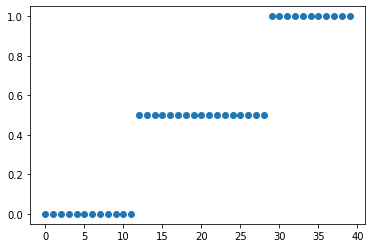

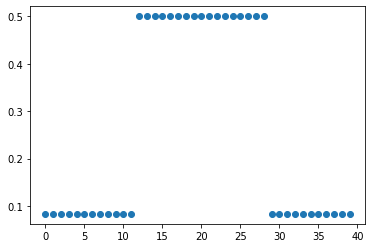

In [31]:
plt.plot(A[::,0],'o')
plt.figure()
plt.plot(A[::,1],'o')

In [7]:
tl.whittle(pm)

-2 -2 1.0 12 2 1.0 0.0 [3 3 3 3 3 2 2 2 2 2 2 2]
-2 -2 0.5 12 4 1.0 0.0 [6 6 6 5 5 4 4 4 3 3 3 4]
-2 -2 0.25 12 8 1.0 0.0 [12 11 11 10  9  8  8  7  6  6  5  8]
-2 -2 0.125 12 11 1.0 0.0 [23 22 21 19 18 16 15 14 12 11 10 16]
-2 -2 0.0625 12 11 1.0 0.0 [46 43 41 38 35 32 30 27 24 22 19 32]
-2 -2 0.03125 12 11 1.0 0.0 [91 86 81 75 70 64 59 54 48 43 38 64]
-2 -2 0.015625 12 11 1.0 0.0 [182 171 161 150 139 128 118 107  96  86  75 128]
-2 -2 0.0078125 12 11 1.0 0.0 [363 342 321 299 278 256 235 214 192 171 150 256]


array([ 0.8359375,  0.671875 ,  0.5078125,  0.3359375,  0.171875 ,
        0.       , -0.1640625, -0.328125 , -0.5      , -0.6640625,
       -0.828125 ,  0.       ])

In [32]:
A

array([[0.    , 0.0833],
       [0.    , 0.0833],
       [0.    , 0.0833],
       [0.    , 0.0833],
       [0.    , 0.0833],
       [0.    , 0.0833],
       [0.    , 0.0833],
       [0.    , 0.0833],
       [0.    , 0.0833],
       [0.    , 0.0833],
       [0.    , 0.0833],
       [0.    , 0.0833],
       [0.5   , 0.5   ],
       [0.5   , 0.5   ],
       [0.5   , 0.5   ],
       [0.5   , 0.5   ],
       [0.5   , 0.5   ],
       [0.5   , 0.5   ],
       [0.5   , 0.5   ],
       [0.5   , 0.5   ],
       [0.5   , 0.5   ],
       [0.5   , 0.5   ],
       [0.5   , 0.5   ],
       [0.5   , 0.5   ],
       [0.5   , 0.5   ],
       [0.5   , 0.5   ],
       [0.5   , 0.5   ],
       [0.5   , 0.5   ],
       [0.5   , 0.5   ],
       [0.9996, 0.0833],
       [0.9996, 0.0833],
       [0.9996, 0.0833],
       [0.9996, 0.0833],
       [0.9996, 0.0833],
       [0.9996, 0.0833],
       [0.9996, 0.0833],
       [0.9996, 0.0833],
       [0.9996, 0.0833],
       [0.9996, 0.0833],
       [0.9996, 0.0833]])

In [27]:
P[2]

array([5.00000000e-001, 5.69618908e-306, 5.56268465e-309, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 5.00000000e-001])

In [28]:
P

array([[5.00000000e-001, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 5.00000000e-001],
       [5.00000000e-001, 5.56268465e-309, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 5.00000000e-001],
       [5.00000000e-001, 5.69618908e-306, 5.56268465e-309,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 5.00000000e-001],
       [5.00000000e-001, 2.91360071e-303, 5.69618908e-306,
        5.56268465e-309, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 5.00000000e-001],
       [5.00000000e-001, 9.92566643e-301, 2.91360071